Last updated: 24 Aug  2024

# 👋 PyCaret Regression singapore hdb resale price

In [1]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.3.2'

Firstly, I install the neccessary libraries.
### **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model** 
<br/>

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


Firstly, I imported the dataset in a pandas dataframe.

In [10]:
!pip install matplotlib seaborn pandas

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Firstly, I load my dataset into panda dataframe.

In [3]:
import pandas as pd
df = pd.read_excel('01_residential_data.xlsx')
df.head()

,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,latitude,longitude,cbd_dist,min_dist_mrt
0,541,ANG MO KIO AVENUE 10,ANG MO KIO,560541,2016-01,3 ROOM,04 TO 06,68.0,New Generation,1981,342000.0,1.373922,103.855621,10065.227930,847.235690
1,333,ANG MO KIO AVENUE 1,ANG MO KIO,560333,2016-01,3 ROOM,10 TO 12,68.0,New Generation,1981,327000.0,1.361343,103.851699,8662.831360,928.311457
2,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01,3 ROOM,01 TO 03,67.0,New Generation,1980,280000.0,1.370816,103.859192,9749.916281,1094.432471
3,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01,4 ROOM,07 TO 09,92.0,New Generation,1980,425000.0,1.370816,103.859192,9749.916281,1094.432471
4,331,ANG MO KIO AVENUE 1,ANG MO KIO,560331,2016-01,3 ROOM,10 TO 12,68.0,New Generation,1981,338000.0,1.362111,103.850767,8747.934242,822.147955


Secondly, I check the number of rows and columns in my dataset.

In [4]:
# Getting the shape of the DataFrame
rows, columns = df.shape

# Printing the number of rows and columns
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 176460
Number of columns: 15


Thirdly, i check the datatype of the columns ensure that it is correct.

In [5]:
# Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176460 entries, 0 to 176459
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   block                176460 non-null  object 
 1   street_name          176460 non-null  object 
 2   town                 176460 non-null  object 
 3   postal_code          176460 non-null  int64  
 4   month                176460 non-null  object 
 5   flat_type            176460 non-null  object 
 6   storey_range         176460 non-null  object 
 7   floor_area_sqm       176460 non-null  float64
 8   flat_model           176460 non-null  object 
 9   lease_commence_date  176460 non-null  int64  
 10  resale_price         176460 non-null  float64
 11  latitude             176460 non-null  float64
 12  longitude            176460 non-null  float64
 13  cbd_dist             176460 non-null  float64
 14  min_dist_mrt         176460 non-null  float64
dtypes: float64(6), in

Next, i take a look at the summary statistics for numeric features.

- **Postal Code:** Values range widely from 50004 to 825195, with a mean around 560889, indicating a broad geographical spread across different postal codes.
- **Floor Area (sqm):** The average floor area is approximately 97.45 square meters, with a range from 31 to 259 square meters, reflecting a variety of HDB flat sizes from smaller units to more spacious ones.
- **Lease Commence Date:** The leases start from as early as 1966 up to 2019, with most around the mid-1990s to early 2000s, suggesting the dataset includes both older and newer HDB flats.
- **Resale Price:** The prices range from about 1.27 million to 1.5 million, with a mean close to $498,000, highlighting significant variation likely influenced by flat attributes like location, size, and age.
- **Geographical Coordinates:** Both latitude and longitude have small standard deviations around their means (1.37 for latitude and 103.84 for longitude), indicating that the flats are concentrated in specific regions of Singapore.
- **Distance to CBD (cbd_dist):** Varies considerably from 592 meters to 23298 meters, showing some flats are very close to the CBD while others are quite distant.
- **Distance to Nearest MRT (min_dist_mrt):** Ranges from 36.08 meters to about 3496.40 meters, pointing to varying levels of accessibility to public transportation across the dataset.

In [6]:
# Statistical summary of numerical features
df.describe()

,postal_code,floor_area_sqm,lease_commence_date,resale_price,latitude,longitude,cbd_dist,min_dist_mrt
count,176460.000000,176460.000000,176460.000000,1.764600e+05,176460.000000,176460.000000,176460.000000,176460.000000
mean,560887.598725,97.449497,1995.223195,4.793598e+05,1.367588,103.841673,12427.507031,831.510563
std,190775.524205,24.049168,13.628932,1.651672e+05,0.042726,0.071216,4395.808395,464.516793
min,50004.000000,31.000000,1966.000000,1.400000e+05,1.270380,103.644248,592.121638,36.079525
25%,510187.000000,82.000000,1985.000000,3.600000e+05,1.336960,103.781229,9681.902128,475.328602
50%,560565.000000,94.000000,1996.000000,4.480000e+05,1.367409,103.846488,13343.661050,744.891776
75%,730149.000000,112.000000,2005.000000,5.680000e+05,1.395796,103.899484,15446.806430,1105.154334
max,825195.000000,259.000000,2019.000000,1.500000e+06,1.457071,103.987804,23298.462280,3496.402761


### **Data Cleaning**

Firstly, I check whether there is any missing value and found out there is no missing value.

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

block                  0
street_name            0
town                   0
postal_code            0
month                  0
flat_type              0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
latitude               0
longitude              0
cbd_dist               0
min_dist_mrt           0
dtype: int64


Secondly, I remove those duplicate rows because duplicates can skew the results, leading to biased estimations and overfitting, particularly in price predictions where unique entries are critical for understanding true market conditions. By eliminating these redundancies, you refine the dataset, improving the model’s generalization ability to unseen data, thus enhancing its predictive performance and ensuring that insights and decisions based on this data are valid and representative of the actual market dynamics.

In [8]:
# Counting duplicates
duplicate_rows = df.duplicated(keep=False)  # 'keep=False' marks all duplicates as True
number_of_duplicates = duplicate_rows.sum()  # Sum of True values in the series
print("Number of duplicate rows:", number_of_duplicates)

Number of duplicate rows: 698


In [9]:
# Remove duplicates: keep the first occurrence by default
# Remove duplicates but keep the first occurrence
df = df.drop_duplicates(keep='first')
df

,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,latitude,longitude,cbd_dist,min_dist_mrt
0,541,ANG MO KIO AVENUE 10,ANG MO KIO,560541,2016-01,3 ROOM,04 TO 06,68.0,New Generation,1981,342000.0,1.373922,103.855621,10065.227930,847.235690
1,333,ANG MO KIO AVENUE 1,ANG MO KIO,560333,2016-01,3 ROOM,10 TO 12,68.0,New Generation,1981,327000.0,1.361343,103.851699,8662.831360,928.311457
2,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01,3 ROOM,01 TO 03,67.0,New Generation,1980,280000.0,1.370816,103.859192,9749.916281,1094.432471
3,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01,4 ROOM,07 TO 09,92.0,New Generation,1980,425000.0,1.370816,103.859192,9749.916281,1094.432471
4,331,ANG MO KIO AVENUE 1,ANG MO KIO,560331,2016-01,3 ROOM,10 TO 12,68.0,New Generation,1981,338000.0,1.362111,103.850767,8747.934242,822.147955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176455,362A,SEMBAWANG CRESCENT,SEMBAWANG,751362,2023-07,4 ROOM,16 TO 18,93.0,Model A,2019,560000.0,1.447195,103.814008,18624.123340,702.591563
176456,362A,SEMBAWANG CRESCENT,SEMBAWANG,751362,2023-07,4 ROOM,04 TO 06,93.0,Model A,2019,550000.0,1.447195,103.814008,18624.123340,702.591563
176457,366B,SEMBAWANG CRESCENT,SEMBAWANG,752366,2023-07,4 ROOM,13 TO 15,93.0,Model A,2019,565000.0,1.443922,103.815957,18223.416060,727.108165
176458,992B,BUANGKOK LINK,HOUGANG,532992,2023-07,4 ROOM,07 TO 09,93.0,Model A,2019,598000.0,1.383827,103.881672,11650.037860,1278.633561


Next, i identify the outliers for all the numerical columns and i found out there is outliers for almost all the column but i will not be removing them because it can lead to a model that fails to accurately reflect the full range of market conditions and property values in HDB resale flats, especially since outliers may represent valid, high-value transactions in premium locations or unique flat characteristics.

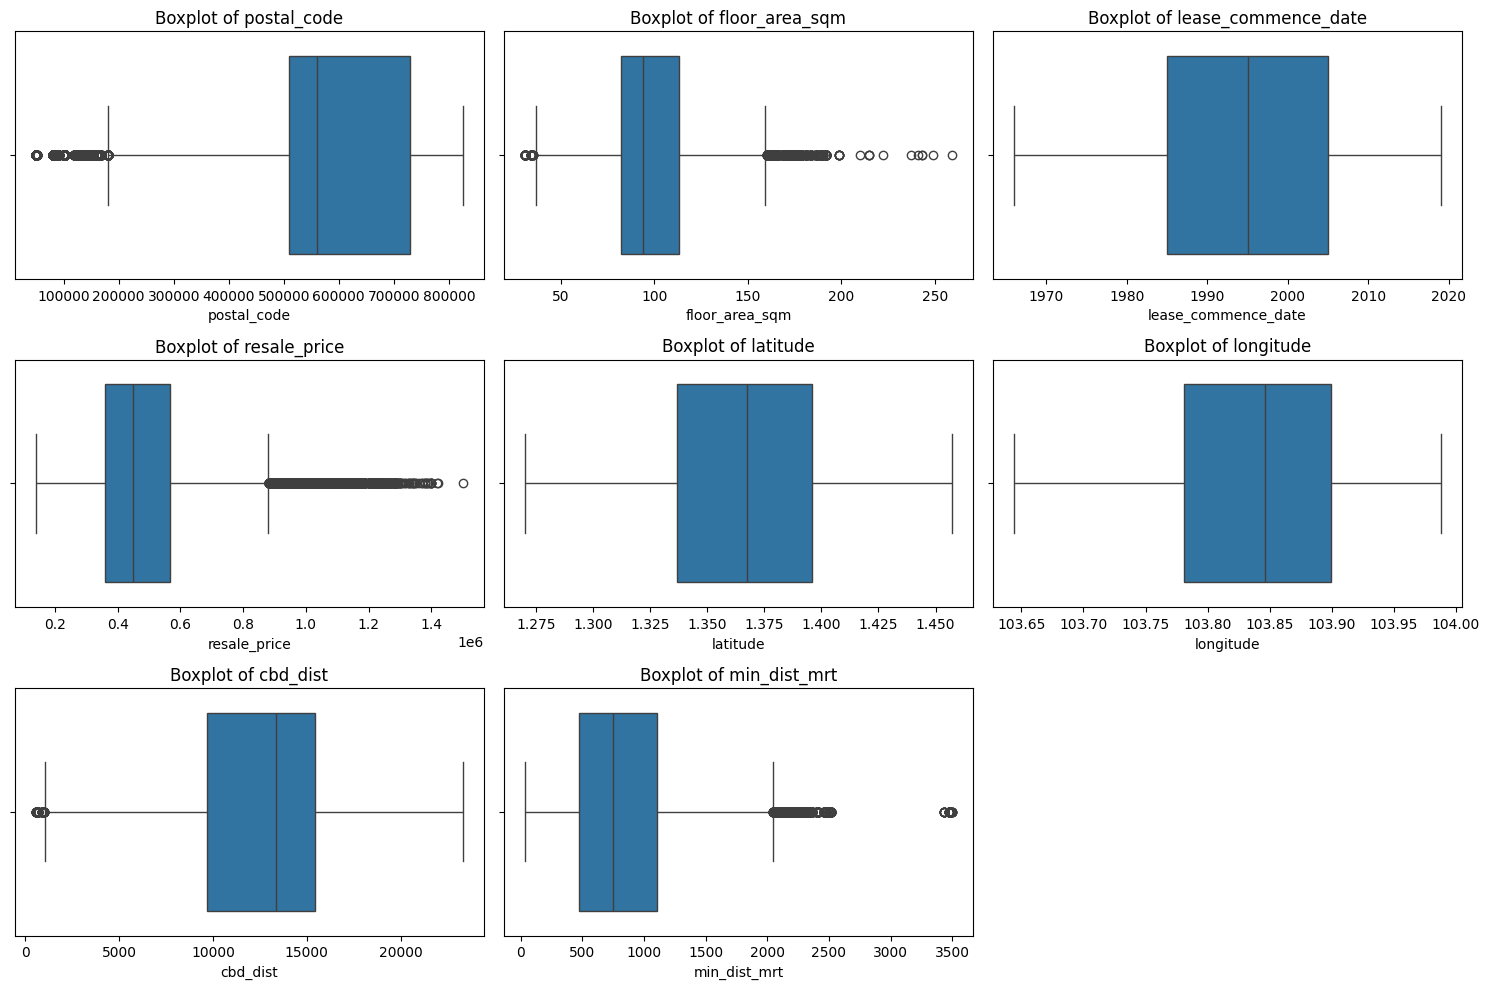

In [12]:
# List of numerical columns to plot
numerical_columns = ['postal_code', 'floor_area_sqm', 'lease_commence_date', 'resale_price', 'latitude', 'longitude', 'cbd_dist', 'min_dist_mrt']

# Setting up the plot size
plt.figure(figsize=(15, 10))

# Loop through the numerical columns and create a boxplot for each
for index, column in enumerate(numerical_columns):
    plt.subplot(3, 3, index + 1)  # Adjust the grid size based on your number of columns
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

In [13]:
# List of numerical columns
numerical_columns = ['postal_code', 'floor_area_sqm', 'lease_commence_date', 'resale_price', 'latitude', 'longitude', 'cbd_dist', 'min_dist_mrt']

# Initialize a dictionary to hold the number of outliers for each column
outliers_count = {}

# Loop through each numerical column to calculate Q1, Q3, IQR, and count outliers
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    outliers_count[column] = len(outliers)

# Print the number of outliers for each column
for column, count in outliers_count.items():
    print(f"Number of outliers in {column}: {count}")

Number of outliers in postal_code: 15190
Number of outliers in floor_area_sqm: 982
Number of outliers in lease_commence_date: 0
Number of outliers in resale_price: 4312
Number of outliers in latitude: 0
Number of outliers in longitude: 0
Number of outliers in cbd_dist: 154
Number of outliers in min_dist_mrt: 3036


### Feature creation ###

Next, I created a new column called age by taking the year of flat and minus the lease commence date to get the age of the flat.

In [14]:
# Convert 'month' to datetime to extract the year
df['year_of_sale'] = pd.to_datetime(df['month']).dt.year

# Calculate the Age of the Flat at the time of sale
df['age'] = df['year_of_sale'] - df['lease_commence_date']

# Create a new DataFrame without the 'year_of_sale' column
df.drop('year_of_sale', axis=1, inplace=True)

# Display the first few rows to confirm the new column
df.head()

,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,latitude,longitude,cbd_dist,min_dist_mrt,age
0,541,ANG MO KIO AVENUE 10,ANG MO KIO,560541,2016-01,3 ROOM,04 TO 06,68.0,New Generation,1981,342000.0,1.373922,103.855621,10065.227930,847.235690,35
1,333,ANG MO KIO AVENUE 1,ANG MO KIO,560333,2016-01,3 ROOM,10 TO 12,68.0,New Generation,1981,327000.0,1.361343,103.851699,8662.831360,928.311457,35
2,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01,3 ROOM,01 TO 03,67.0,New Generation,1980,280000.0,1.370816,103.859192,9749.916281,1094.432471,36
3,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01,4 ROOM,07 TO 09,92.0,New Generation,1980,425000.0,1.370816,103.859192,9749.916281,1094.432471,36
4,331,ANG MO KIO AVENUE 1,ANG MO KIO,560331,2016-01,3 ROOM,10 TO 12,68.0,New Generation,1981,338000.0,1.362111,103.850767,8747.934242,822.147955,35


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176111 entries, 0 to 176459
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   block                176111 non-null  object 
 1   street_name          176111 non-null  object 
 2   town                 176111 non-null  object 
 3   postal_code          176111 non-null  int64  
 4   month                176111 non-null  object 
 5   flat_type            176111 non-null  object 
 6   storey_range         176111 non-null  object 
 7   floor_area_sqm       176111 non-null  float64
 8   flat_model           176111 non-null  object 
 9   lease_commence_date  176111 non-null  int64  
 10  resale_price         176111 non-null  float64
 11  latitude             176111 non-null  float64
 12  longitude            176111 non-null  float64
 13  cbd_dist             176111 non-null  float64
 14  min_dist_mrt         176111 non-null  float64
 15  age                  1

The feature importance graph visually represents the relative significance of various predictors in the model for estimating the resale price of HDB flats. It is evident from the graph that floor_area_sqm, cbd_dist, and lease commence date are the most influential features, indicating that the size of the flat, proximity to the Central Business District, and date have substantial impacts on the resale price. Notably, floor_area_sqm stands out as the most critical factor, suggesting that larger flats tend to command higher prices. On the other hand, attributes like town, age, and street_name have minimal influence, implying that these factors are less critical in determining the resale price within the model's context. I will be using all the feature even though that have minimal influence.

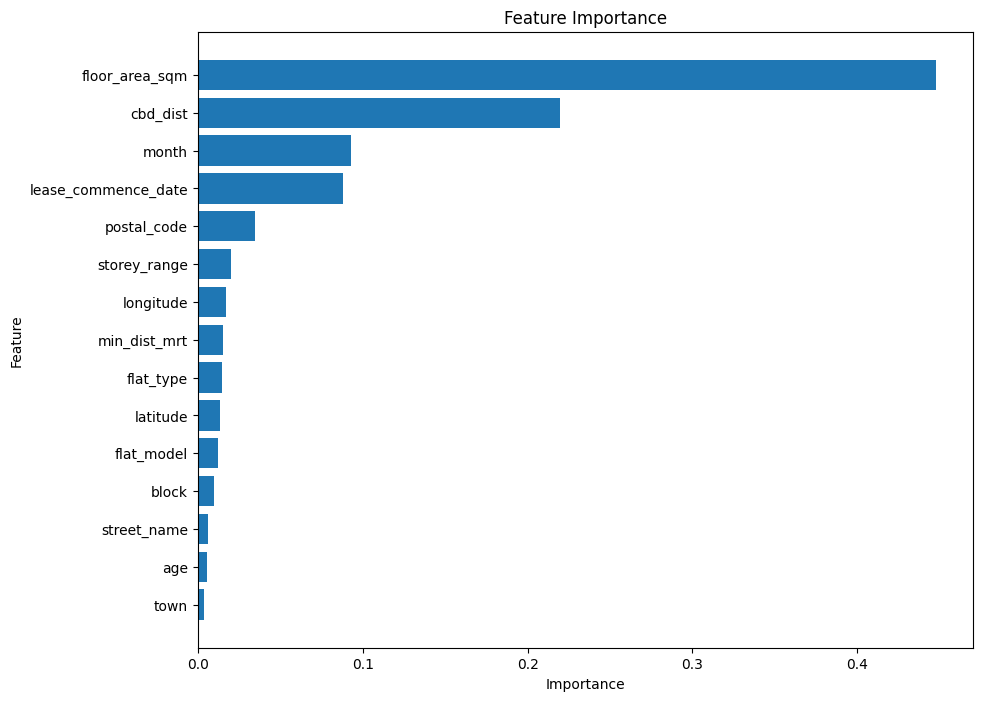

In [16]:
# # Convert 'month' column to datetime
# df['month'] = pd.to_datetime(df['month'], format='%Y-%m')

# Initialize a dictionary to store label encoders
label_encoders = {}

# Identify columns to encode (assuming all object type columns are categorical)
categorical_columns = df.select_dtypes(include=['object']).columns

# Ensure all categorical columns are of type string to avoid mixed type issues
df[categorical_columns] = df[categorical_columns].astype(str)

# Apply Label Encoding to each categorical column and store each encoder
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store the label encoder for later use

# Separate features and target
X = df.drop(['resale_price'], axis=1)  # Excluding 'month' if it's still datetime type
y = df['resale_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()

In [17]:
print(label_encoders)

{'block': LabelEncoder(), 'street_name': LabelEncoder(), 'town': LabelEncoder(), 'month': LabelEncoder(), 'flat_type': LabelEncoder(), 'storey_range': LabelEncoder(), 'flat_model': LabelEncoder()}


Next, i decode all the categorical value back to the orignial values.

In [18]:
# Loop through each categorical column and decode it
for column in categorical_columns:
    df[column] = label_encoders[column].inverse_transform(df[column])

In [19]:
df

,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,latitude,longitude,cbd_dist,min_dist_mrt,age
0,541,ANG MO KIO AVENUE 10,ANG MO KIO,560541,2016-01,3 ROOM,04 TO 06,68.0,New Generation,1981,342000.0,1.373922,103.855621,10065.227930,847.235690,35
1,333,ANG MO KIO AVENUE 1,ANG MO KIO,560333,2016-01,3 ROOM,10 TO 12,68.0,New Generation,1981,327000.0,1.361343,103.851699,8662.831360,928.311457,35
2,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01,3 ROOM,01 TO 03,67.0,New Generation,1980,280000.0,1.370816,103.859192,9749.916281,1094.432471,36
3,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01,4 ROOM,07 TO 09,92.0,New Generation,1980,425000.0,1.370816,103.859192,9749.916281,1094.432471,36
4,331,ANG MO KIO AVENUE 1,ANG MO KIO,560331,2016-01,3 ROOM,10 TO 12,68.0,New Generation,1981,338000.0,1.362111,103.850767,8747.934242,822.147955,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176455,362A,SEMBAWANG CRESCENT,SEMBAWANG,751362,2023-07,4 ROOM,16 TO 18,93.0,Model A,2019,560000.0,1.447195,103.814008,18624.123340,702.591563,4
176456,362A,SEMBAWANG CRESCENT,SEMBAWANG,751362,2023-07,4 ROOM,04 TO 06,93.0,Model A,2019,550000.0,1.447195,103.814008,18624.123340,702.591563,4
176457,366B,SEMBAWANG CRESCENT,SEMBAWANG,752366,2023-07,4 ROOM,13 TO 15,93.0,Model A,2019,565000.0,1.443922,103.815957,18223.416060,727.108165,4
176458,992B,BUANGKOK LINK,HOUGANG,532992,2023-07,4 ROOM,07 TO 09,93.0,Model A,2019,598000.0,1.383827,103.881672,11650.037860,1278.633561,4


### Exploratory Data Analysis (EDA) ###

The histogram above displays the distribution of resale prices for HDB flats. The distribution is unimodal and skewed to the right, indicating that most of the resale transactions are clustered around lower price ranges, with a peak frequency occurring just below SGD 0.4 million. The frequency of transactions decreases as the price increases, which suggests that higher-priced HDB flats are less common. There are very few transactions above SGD 0.8 million, highlighting that such high-priced flats represent a small portion of the market. This graph provides a clear visualization of how resale prices are spread across the market, which is crucial for understanding the typical price range and outliers in HDB resale transactions.

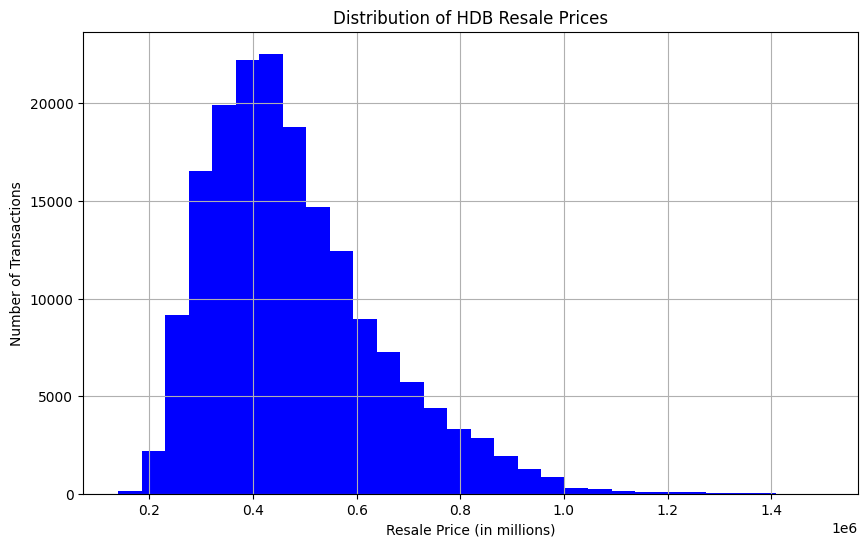

In [20]:
# Assuming 'resale_price' has already been loaded into 'df'
plt.figure(figsize=(10, 6))
plt.hist(df['resale_price'], bins=30, color='blue')
plt.title('Distribution of HDB Resale Prices')
plt.xlabel('Resale Price (in millions)')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

This bar chart shows that the Four-room flats are the most common, followed closely by three-room and then five-room flats, indicating a higher demand or availability for these sizes. Executive flats also show significant representation, whereas two-room, one-room, and multi-generation flats are considerably less common. This pattern suggests that middle-sized flats (three to five rooms) are the most popular choice among HDB buyers, potentially due to their balance of affordability and space, catering well to the needs of typical families. The low count of multi-generation and smaller flats (one and two rooms) highlights their niche status in the market.

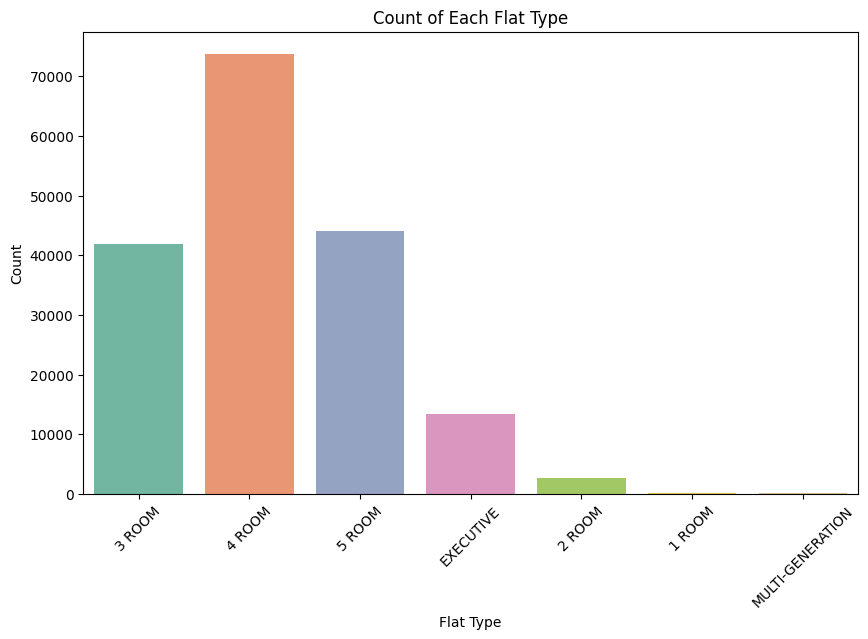

In [21]:
# Create a bar chart for the count of each flat type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='flat_type', palette='Set2')
plt.title('Count of Each Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

This line graph displays the trend in the average resale price of HDB flats from 2016 to 2023, showing a steep increase over the period, especially from 2019 onwards. The prices remained relatively stable from 2016 to 2019, fluctuating slightly around SGD 440,000 to SGD 460,000. However, beginning in 2020, there is a sharp upward trajectory, with prices reaching approximately SGD 560,000 by 2023. This suggests a significant growth in market value over the last few years, which could be attributed to various factors such as changes in housing policies, market demand, economic conditions, or enhancements in housing features.

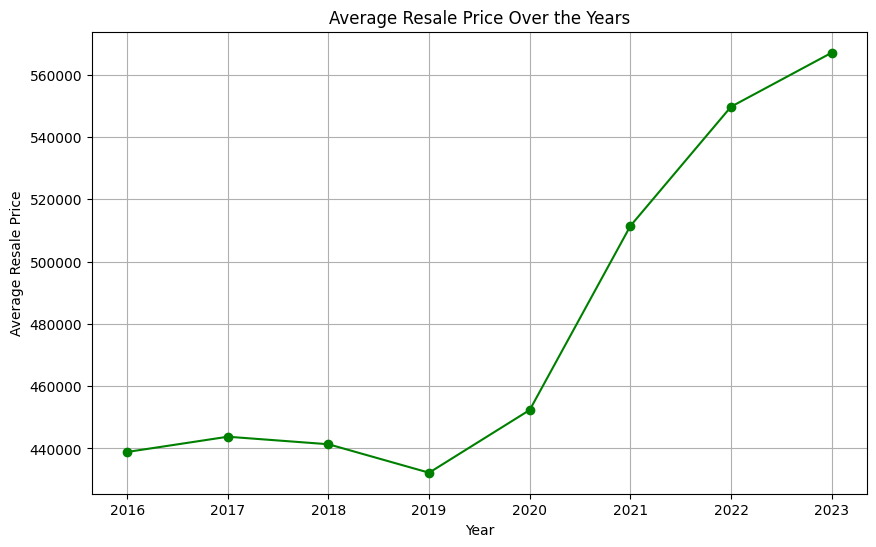

In [22]:
# Ensure 'month' column is in datetime format to extract the year
df['year'] = pd.to_datetime(df['month']).dt.year

# Calculate average resale price per year
average_price_per_year = df.groupby('year')['resale_price'].mean()

# Create a line graph for average resale price over the years
plt.figure(figsize=(10, 6))
average_price_per_year.plot(kind='line', marker='o', color='green')
plt.title('Average Resale Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Resale Price')
plt.grid(True)
plt.show()

This heatmap shows that areas with darker blue shades represent higher resale prices, while lighter shades indicate lower prices. The map shows significant variation in resale prices across different regions, with some clusters of high-value properties primarily concentrated towards the central and southeastern parts of the island. This visualization helps identify hotspots with higher property values and can be crucial for understanding spatial patterns in housing prices, possibly influenced by factors like proximity to the city center, amenities, or public transport links.

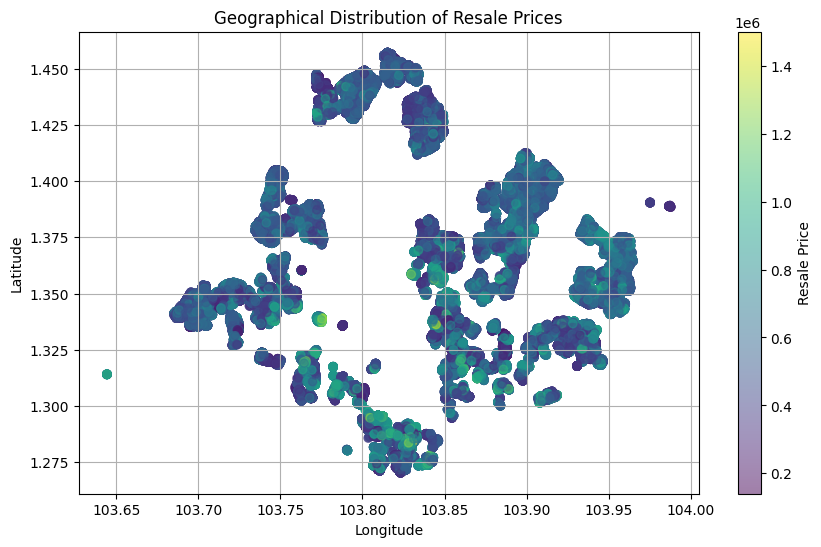

In [23]:
# Scatter plot on map assuming longitude and latitude are present
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['resale_price'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Resale Price')
plt.title('Geographical Distribution of Resale Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [24]:
# Drop the 'year' column from the DataFrame
df = df.drop('year', axis=1)
df

,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,latitude,longitude,cbd_dist,min_dist_mrt,age
0,541,ANG MO KIO AVENUE 10,ANG MO KIO,560541,2016-01,3 ROOM,04 TO 06,68.0,New Generation,1981,342000.0,1.373922,103.855621,10065.227930,847.235690,35
1,333,ANG MO KIO AVENUE 1,ANG MO KIO,560333,2016-01,3 ROOM,10 TO 12,68.0,New Generation,1981,327000.0,1.361343,103.851699,8662.831360,928.311457,35
2,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01,3 ROOM,01 TO 03,67.0,New Generation,1980,280000.0,1.370816,103.859192,9749.916281,1094.432471,36
3,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01,4 ROOM,07 TO 09,92.0,New Generation,1980,425000.0,1.370816,103.859192,9749.916281,1094.432471,36
4,331,ANG MO KIO AVENUE 1,ANG MO KIO,560331,2016-01,3 ROOM,10 TO 12,68.0,New Generation,1981,338000.0,1.362111,103.850767,8747.934242,822.147955,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176455,362A,SEMBAWANG CRESCENT,SEMBAWANG,751362,2023-07,4 ROOM,16 TO 18,93.0,Model A,2019,560000.0,1.447195,103.814008,18624.123340,702.591563,4
176456,362A,SEMBAWANG CRESCENT,SEMBAWANG,751362,2023-07,4 ROOM,04 TO 06,93.0,Model A,2019,550000.0,1.447195,103.814008,18624.123340,702.591563,4
176457,366B,SEMBAWANG CRESCENT,SEMBAWANG,752366,2023-07,4 ROOM,13 TO 15,93.0,Model A,2019,565000.0,1.443922,103.815957,18223.416060,727.108165,4
176458,992B,BUANGKOK LINK,HOUGANG,532992,2023-07,4 ROOM,07 TO 09,93.0,Model A,2019,598000.0,1.383827,103.881672,11650.037860,1278.633561,4


In [25]:
# Applying logarithmic transformation to the 'resale_price'
df['resale_price'] = np.log(df['resale_price'])
df

,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,latitude,longitude,cbd_dist,min_dist_mrt,age
0,541,ANG MO KIO AVENUE 10,ANG MO KIO,560541,2016-01,3 ROOM,04 TO 06,68.0,New Generation,1981,12.742566,1.373922,103.855621,10065.227930,847.235690,35
1,333,ANG MO KIO AVENUE 1,ANG MO KIO,560333,2016-01,3 ROOM,10 TO 12,68.0,New Generation,1981,12.697715,1.361343,103.851699,8662.831360,928.311457,35
2,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01,3 ROOM,01 TO 03,67.0,New Generation,1980,12.542545,1.370816,103.859192,9749.916281,1094.432471,36
3,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01,4 ROOM,07 TO 09,92.0,New Generation,1980,12.959844,1.370816,103.859192,9749.916281,1094.432471,36
4,331,ANG MO KIO AVENUE 1,ANG MO KIO,560331,2016-01,3 ROOM,10 TO 12,68.0,New Generation,1981,12.730801,1.362111,103.850767,8747.934242,822.147955,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176455,362A,SEMBAWANG CRESCENT,SEMBAWANG,751362,2023-07,4 ROOM,16 TO 18,93.0,Model A,2019,13.235692,1.447195,103.814008,18624.123340,702.591563,4
176456,362A,SEMBAWANG CRESCENT,SEMBAWANG,751362,2023-07,4 ROOM,04 TO 06,93.0,Model A,2019,13.217674,1.447195,103.814008,18624.123340,702.591563,4
176457,366B,SEMBAWANG CRESCENT,SEMBAWANG,752366,2023-07,4 ROOM,13 TO 15,93.0,Model A,2019,13.244581,1.443922,103.815957,18223.416060,727.108165,4
176458,992B,BUANGKOK LINK,HOUGANG,532992,2023-07,4 ROOM,07 TO 09,93.0,Model A,2019,13.301346,1.383827,103.881672,11650.037860,1278.633561,4


In [26]:
# Split the data into training and validation sets
df, df_validation = train_test_split(df, test_size=0.1, random_state=123)  # Ensures reproducibility

In [27]:
# Print the number of rows in each DataFrame
print("Number of rows in training set:", df.shape[0])
print("Number of rows in validation set:", df_validation.shape[0])

Number of rows in training set: 158499
Number of rows in validation set: 17612


In [28]:
df.head()

,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,latitude,longitude,cbd_dist,min_dist_mrt,age
126025,511B,YISHUN STREET 51,YISHUN,762511,2021-08,4 ROOM,10 TO 12,93.0,Model A,2017,13.066851,1.415600,103.842414,14695.557110,1068.249061,4
10571,468A,ADMIRALTY DRIVE,SEMBAWANG,751468,2016-07,EXECUTIVE,16 TO 18,137.0,Premium Apartment,2001,13.102161,1.450513,103.813729,18988.817180,721.329044,15
78144,216,YISHUN STREET 21,YISHUN,760216,2019-10,3 ROOM,04 TO 06,68.0,New Generation,1985,12.506177,1.432276,103.836404,16589.205030,349.799911,34
74630,12,HOLLAND AVENUE,QUEENSTOWN,272012,2019-08,3 ROOM,19 TO 21,73.0,Improved,1975,12.971540,1.309353,103.794873,6922.933061,361.627866,44
36246,50,COMMONWEALTH DRIVE,QUEENSTOWN,142050,2017-10,4 ROOM,37 TO 39,93.0,Model A,2015,13.617060,1.301129,103.797123,6353.937689,195.403809,2


In [29]:
df_validation.head()

,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,latitude,longitude,cbd_dist,min_dist_mrt,age
35,208,BUKIT BATOK STREET 21,BUKIT BATOK,650208,2016-01,3 ROOM,07 TO 09,73.0,Model A,1983,12.694653,1.345903,103.748812,13359.44249,315.864414,33
21577,268A,PUNGGOL FIELD,PUNGGOL,821268,2017-02,5 ROOM,13 TO 15,113.0,Premium Apartment,2013,13.362954,1.404112,103.897399,14340.94675,1389.423130,4
53552,899C,WOODLANDS DRIVE 50,WOODLANDS,732899,2018-08,4 ROOM,01 TO 03,100.0,Model A,1997,12.660328,1.436570,103.795261,18089.96378,777.154273,21
164556,918,HOUGANG AVENUE 9,HOUGANG,530918,2023-01,4 ROOM,13 TO 15,100.0,Model A,1998,13.214031,1.375585,103.883516,10847.18959,1094.714119,25
153952,183,JELEBU ROAD,BUKIT PANJANG,670183,2022-09,4 ROOM,07 TO 09,91.0,Premium Apartment,2003,13.377006,1.379964,103.763048,14540.22250,211.665705,19


## Setup/ Experiment logging

This configuration outlines a machine learning setup for predicting HDB resale prices in Singapore using the PyCaret library, with key components including z-score normalization of numeric features, selective feature exclusion, and MLflow integration for tracking. The setup employs KFold cross-validation with 10 folds and handles preprocessing with specific strategies for imputation and one-hot encoding. The entire process is reproducible due to a fixed session ID and logs experiments under a specific project name in MLflow.

In [30]:
# import pycaret regression and init setup
import mlflow
from pycaret.regression import *

# Setting up MLflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")  # Set to your MLflow server URI
mlflow.set_experiment('singapore_hdb_resale_price_predictions')

# Setting up PyCaret with the log-transformed target and other configurations
s = setup(data = df, target = 'resale_price',
          normalize = True,
          # bin_numeric_features = ['age'],
          # polynomial_features = True,
          ignore_features = ['month', 'lease_commence_date'],
          experiment_name='singapore_hdb_resale_price_predictions',
          log_experiment='mlflow',
          session_id = 123)  # Ensures reproducibility

2024/08/23 19:40:40 INFO mlflow.tracking.fluent: Experiment with name 'singapore_hdb_resale_price_predictions' does not exist. Creating a new experiment.


,Description,Value
0,Session id,123
1,Target,resale_price
2,Target type,Regression
3,Original data shape,"(158499, 16)"
4,Transformed data shape,"(158499, 56)"
5,Transformed train set shape,"(110949, 56)"
6,Transformed test set shape,"(47550, 56)"
7,Ignore features,2
8,Numeric features,7
9,Categorical features,6


## Compare Models ##

This shows that Random Forest Regressor (rf) model stands out as the best among the compared models for predicting HDB resale prices. This determination is primarily due to its superior performance metrics: it has the lowest Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE), coupled with the highest R-squared (R2) value. These metrics indicate that the Random Forest model not only predicts with minimal error but also explains a significant portion of the variance in the data, suggesting a high level of accuracy and reliability in its predictions compared to other models listed.

In [31]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.0515,0.0048,0.0691,0.9563,0.0049,0.0040,23.5840
et,Extra Trees Regressor,0.0526,0.0050,0.0707,0.9543,0.0051,0.0040,20.4520
catboost,CatBoost Regressor,0.0636,0.0067,0.0820,0.9385,0.0059,0.0049,9.1070
xgboost,Extreme Gradient Boosting,0.0651,0.0070,0.0839,0.9355,0.0060,0.0050,1.2260
dt,Decision Tree Regressor,0.0669,0.0087,0.0931,0.9207,0.0067,0.0051,0.7350
lightgbm,Light Gradient Boosting Machine,0.0782,0.0097,0.0986,0.9110,0.0070,0.0060,0.9500
knn,K Neighbors Regressor,0.0855,0.0124,0.1112,0.8867,0.0080,0.0066,2.6920
gbr,Gradient Boosting Regressor,0.1010,0.0156,0.1251,0.8567,0.0089,0.0078,7.2850
ridge,Ridge Regression,0.1196,0.0215,0.1465,0.8035,0.0105,0.0092,0.4220
br,Bayesian Ridge,0.1196,0.0215,0.1465,0.8035,0.0105,0.0092,0.6030


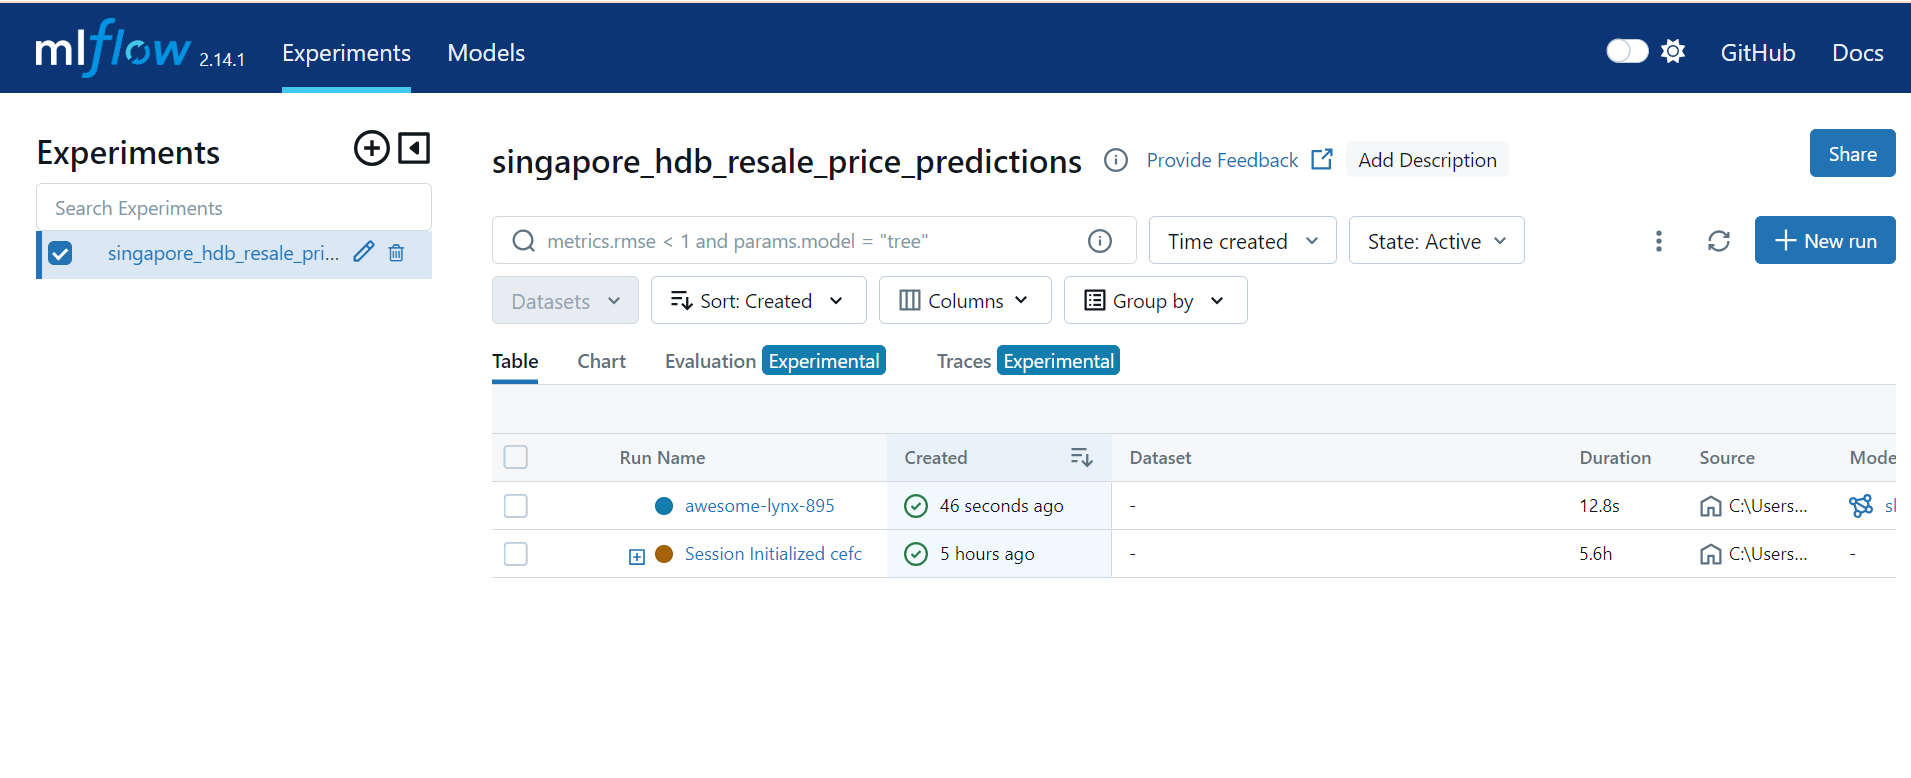

## Analyse Model ###

Residuals are plotted against the predicted values, with separate colors representing the training (blue) and test (green) datasets. The relatively tight clustering of points around the horizontal line at zero indicates that the model has a good fit, with most predictions being close to the actual values. The R-squared values are exceptionally high for both the training (0.993) and testing sets (0.958), confirming the model's strong predictive accuracy. The histogram on the right shows the distribution of residuals, which appears centered around zero with a normal-like distribution, further supporting the model's effectiveness.

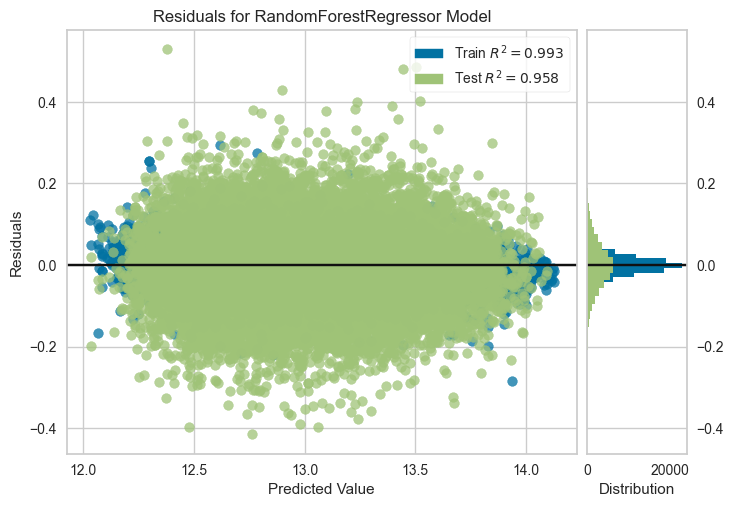

In [35]:
# plot residuals
plot_model(best, plot = 'residuals')

The points are plotted to assess how closely the predictions align with the true values. The solid line represents the identity line where predicted values equal actual values, while the dashed line illustrates the model's best fit line. A high R-squared value of 0.958 suggests that the model accurately captures the variance in the data. The dense clustering of points along the identity line, particularly towards the center of the plot, indicates strong predictive performance, with most predictions being close to the actual values.

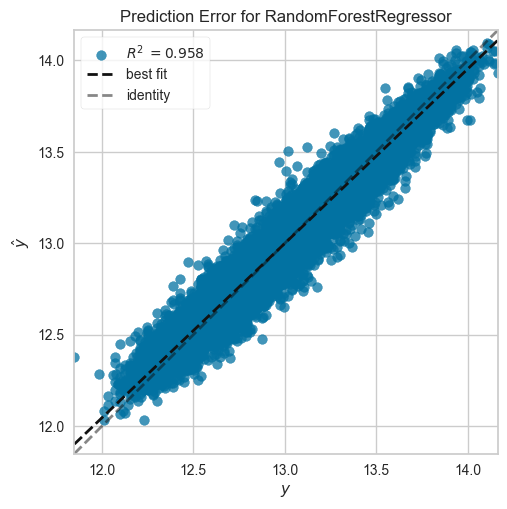

In [36]:
# plot error
plot_model(best, plot = 'error')

The Feature Importance Plot visualizes the relative importance of various features in the prediction of HDB resale prices by a machine learning model. The plot shows that 'floor_area_sqm' is the most significant predictor, indicating that the size of the flat is the primary driver of its resale price. Other important features include 'street_name' and 'age', reflecting the influence of location and the age of the property on its value. Conversely, features like 'town', 'longitude', and 'min_dist_mrt' have relatively lower importance, suggesting they have less impact on the resale price compared to other factors. This visualization helps in understanding which attributes are most influential in the model's predictions, guiding data collection and feature engineering efforts.

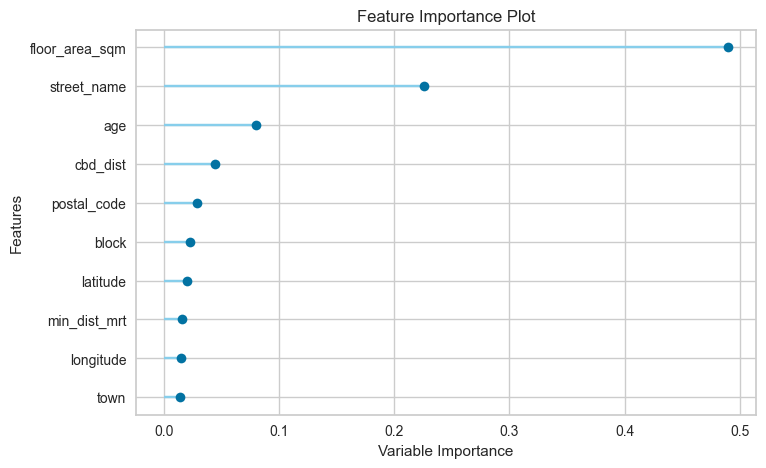

In [37]:
# plot feature importance
plot_model(best, plot = 'feature')

In [59]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Tune Model ##

Next, I tune my best model which is randomforest regressor (rf) using the tune_model function from PyCaret is configured to run 5 iterations of parameter tuning, leveraging a 3-fold cross-validation approach specifically to optimize the model's R-squared (R2) value. By setting return_tuner=True, the function also returns the tuner object, allowing further introspection or manual adjustments to the tuning process if necessary. This approach systematically searches for the optimal set of parameters that yield the highest R2 score, thereby potentially improving the model's performance in predicting outcomes more accurately.

In [39]:
best

RandomForestRegressor(n_jobs=-1, random_state=123)

After tuning the Random Forest Regressor model using a 3-fold cross-validation with 5 iterations, the model's performance metrics appear to have deteriorated compared to the initial evaluation using 10-fold cross-validation. The tuned model exhibits a mean R-squared (R2) of 0.6111, which is significantly lower than the initial R2 of 0.9563. Additionally, the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) have also increased from 0.0515 and 0.0691 in the original assessment to 0.1652 and 0.2061, respectively, after tuning. This suggests that the tuning process, in this case, may not have been beneficial, potentially due to overfitting or suboptimal parameter selection during the tuning phase.

In [41]:
# to access the tuner object you can set return_tuner = True
tuned_rf, tuner_rf = tune_model(best, return_tuner=True,n_iter=5, optimize='R2', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1645,0.0421,0.2052,0.6127,0.0146,0.0126
1,0.1668,0.0433,0.2080,0.6062,0.0148,0.0128
2,0.1643,0.0421,0.2051,0.6145,0.0146,0.0126
Mean,0.1652,0.0425,0.2061,0.6111,0.0147,0.0127
Std,0.0012,0.0005,0.0013,0.0035,0.0001,0.0001


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [42]:
# model object
tuned_rf

RandomForestRegressor(n_jobs=-1, random_state=123)

In [43]:
# tuner object
tuner_rf

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['postal_code',
                                                                          'floor_area_sqm',
                                                                          'latitude',
                                                                          'longitude',
                                                                          'cbd_dist',
                                                                          'min_dist_mrt',
                                                                          'age'],
                                                                 transformer=SimpleImputer())),
                                             ('categorical_imputer',
                                              TransformerWrapper(include=['block...
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10],
                                        'actual_estimator__n_estimators': [10,
                                                                           20,
                                                                           30,
                                                                           40,
                                                                           50,
                                                                           60,
                                                                           70,
                                                                           80,
                                                                           90,
                                                                           100,
                                                                           110,
                                                                           120,
                                                                           130,
                                                                           140

## ✅ Finalize Model

I store my finalize which is my best model in best_model.

In [49]:
best_model = best

## Prediction ##

In [50]:
# predict on test set
holdout_pred = predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.0510,0.0047,0.0685,0.9577,0.0049,0.0039


The table showcases the predictive accuracy of the model for HDB resale prices across different Singaporean towns and flat types. Each entry lists actual resale prices alongside the model's predictions, which are remarkably close to the actual figures, indicating high model fidelity. This close alignment between the predicted and actual values suggests that the model effectively captures the underlying patterns and influences affecting resale prices. Moreover, the model's predictions are consistent across a variety of flat types and locations, further evidencing its robustness and reliability in real-world applications.

In [51]:
# show predictions df
holdout_pred.head()

,block,street_name,town,postal_code,flat_type,storey_range,floor_area_sqm,flat_model,latitude,longitude,cbd_dist,min_dist_mrt,age,resale_price,prediction_label
13362,302,ANG MO KIO AVENUE 3,ANG MO KIO,560302,3 ROOM,04 TO 06,73.0,New Generation,1.367090,103.845657,9319.381836,495.225220,38,12.774223,12.826436
82498,583,WOODLANDS DRIVE 16,WOODLANDS,730583,EXECUTIVE,04 TO 06,131.0,Apartment,1.430396,103.795319,17448.511719,431.570312,18,13.091905,13.120048
64914,47,BENDEMEER ROAD,KALLANG/WHAMPOA,330047,3 ROOM,01 TO 03,65.0,Improved,1.323397,103.866814,4788.925781,583.398376,45,12.380026,12.498521
144348,213B,PUNGGOL WALK,PUNGGOL,822213,4 ROOM,10 TO 12,93.0,Model A,1.400720,103.898483,14036.114258,1052.304443,7,13.226724,13.238111
88317,106,SPOTTISWOODE PARK ROAD,BUKIT MERAH,80106,5 ROOM,13 TO 15,118.0,Standard,1.273567,103.834061,2184.059082,994.852844,41,13.484225,13.494095


Next, I test it on my validation dataset but firstly remove the target column.

In [52]:
# copy data and drop charges
new_data = df_validation.copy()
new_data.drop('resale_price', axis=1, inplace=True)
new_data.head()

,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,cbd_dist,min_dist_mrt,age
35,208,BUKIT BATOK STREET 21,BUKIT BATOK,650208,2016-01,3 ROOM,07 TO 09,73.0,Model A,1983,1.345903,103.748812,13359.44249,315.864414,33
21577,268A,PUNGGOL FIELD,PUNGGOL,821268,2017-02,5 ROOM,13 TO 15,113.0,Premium Apartment,2013,1.404112,103.897399,14340.94675,1389.423130,4
53552,899C,WOODLANDS DRIVE 50,WOODLANDS,732899,2018-08,4 ROOM,01 TO 03,100.0,Model A,1997,1.436570,103.795261,18089.96378,777.154273,21
164556,918,HOUGANG AVENUE 9,HOUGANG,530918,2023-01,4 ROOM,13 TO 15,100.0,Model A,1998,1.375585,103.883516,10847.18959,1094.714119,25
153952,183,JELEBU ROAD,BUKIT PANJANG,670183,2022-09,4 ROOM,07 TO 09,91.0,Premium Apartment,2003,1.379964,103.763048,14540.22250,211.665705,19


This is the prediction on the validation dataset.

In [53]:
# predict model on new_data
predictions = predict_model(best_model, data = new_data)
predictions.head()

,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,cbd_dist,min_dist_mrt,age,prediction_label
35,208,BUKIT BATOK STREET 21,BUKIT BATOK,650208,2016-01,3 ROOM,07 TO 09,73.0,Model A,1983,1.345903,103.748810,13359.442383,315.864410,33,12.592741
21577,268A,PUNGGOL FIELD,PUNGGOL,821268,2017-02,5 ROOM,13 TO 15,113.0,Premium Apartment,2013,1.404112,103.897400,14340.946289,1389.423096,4,13.220254
53552,899C,WOODLANDS DRIVE 50,WOODLANDS,732899,2018-08,4 ROOM,01 TO 03,100.0,Model A,1997,1.436570,103.795258,18089.962891,777.154297,21,12.687684
164556,918,HOUGANG AVENUE 9,HOUGANG,530918,2023-01,4 ROOM,13 TO 15,100.0,Model A,1998,1.375584,103.883514,10847.189453,1094.714111,25,13.181395
153952,183,JELEBU ROAD,BUKIT PANJANG,670183,2022-09,4 ROOM,07 TO 09,91.0,Premium Apartment,2003,1.379964,103.763046,14540.222656,211.665710,19,13.351799


## Save Model

Next, I load the pipleline and then i save the model.

In [54]:
# load pipeline
loaded_best_pipeline = load_model('singapore_hdb_resale_price_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\kavan\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['postal_code', 'floor_area_sqm',
                                             'latitude', 'longitude',
                                             'cbd_dist', 'min_dist_mrt',
                                             'age'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['block', 'street_name', 'town',
                                             'flat_type', 'storey...
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('rest_encoding',
                 TransformerWrapper(include=['block', 'street_name', 'town'],
                                    transformer=TargetEncoder(cols=['block',
                                                                    'street_name',
                                                                    'town'],
                                                              handle_missing='return_nan'))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('trained_model',
                 RandomForestRegressor(n_jobs=-1, random_state=123))])

In [55]:
# save pipeline
save_model(best, 'singapore_hdb_resale_price_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['postal_code', 'floor_area_sqm',
                                              'latitude', 'longitude',
                                              'cbd_dist', 'min_dist_mrt',
                                              'age'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['block', 'street_name', 'town',
                                              'flat_type', 'storey_range',
                                              'flat_model'],
                                     transformer=Simple...
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('rest_encoding',
                  TransformerWrapper(include=['b

# Register MLFLOW #

## Save / Load Model / Load Experiment ##

Next i want to check whether my transformation pipeline and model is successfully save and show my current experiment id which is 779404346030907506. Next i register my model with mlflow and name it as best_model_regression and ensure that the pipeline excution is complete..

In [56]:
import mlflow

save_model(best_model, 'best_model_regression')

# Set up MLflow
mlflow.set_tracking_uri("http://localhost:5000")
experiment = mlflow.get_experiment_by_name("singapore_hdb_resale_price_predictions")
print(f"Current experiment ID: {experiment.experiment_id}")

Transformation Pipeline and Model Successfully Saved
Current experiment ID: 779404346030907506


In [58]:
from mlflow.sklearn import log_model
import mlflow

def register_model_with_mlflow(model, model_name="best_model", experiment_id=None):
    # End any active runs
    mlflow.end_run()
    
    # Start a new run with the correct experiment ID
    if experiment_id is not None:
        # Use the experiment_id directly when starting the run
        with mlflow.start_run(experiment_id=experiment_id):
            try:
                log_model(model, model_name)
                print(f"Model registered with MLflow as {model_name}")
            except Exception as e:
                print(f"Error logging model: {e}")
            finally:
                mlflow.end_run()
    else:
        print("No experiment ID provided. Please provide a valid experiment ID.")

# Retrieve the correct experiment ID and ensure it is correctly assigned
experiment_id = "779404346030907506"  # Update this with the correct ID you have confirmed

# Assuming 'best_model' is the correct model object you want to register
register_model_with_mlflow(best_model, model_name="best_model_regression", experiment_id=experiment_id)
print("Pipeline execution completed.")

Model registered with MLflow as best_model_regression
Pipeline execution completed.


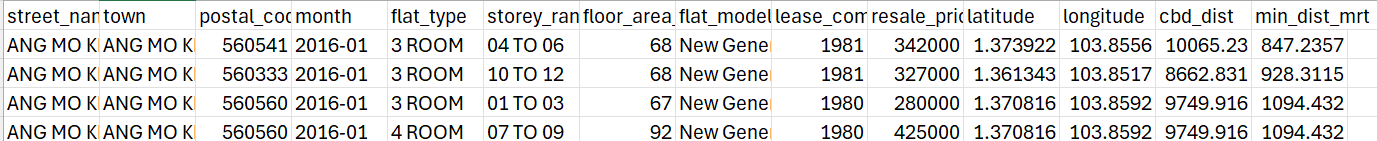